In [2]:
import yfinance as yf
import os
import pandas as pd

In [3]:
btc_ticker = yf.Ticker("BTC-USD")

In [4]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [5]:
btc.index = pd.to_datetime(btc.index)

In [6]:
del btc["Dividends"]
del btc["Stock Splits"]

In [7]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

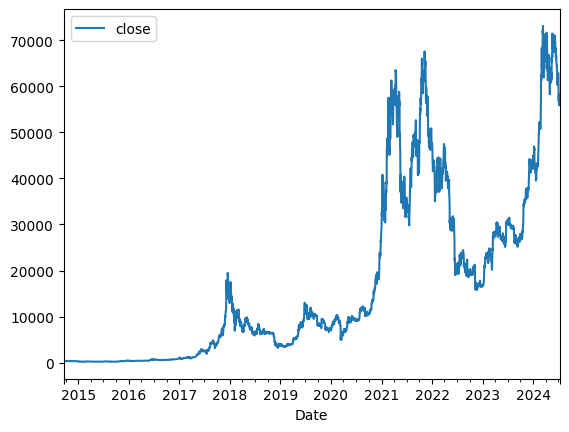

In [8]:
btc.plot.line(y="close", use_index=True)

In [27]:
btc["tomorrow"] = btc["close"].shift(-1)

In [28]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [30]:
btc

open          high           low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2024-07-07 00:00:00+00:00  58239.429688  58371.121094  55793.324219   
2024-07-08 00:00:00+00:00  55849.574219  58131.335938  54321.019531   
2024-07-09 00:00:00+00:00  56704.597656  58239.195312  56316.875000   
2024-07-10 00:00:00+00:00  58033.882812  59359.433594  57178.414062   
2024-07-11 00:00:00+00:00  57729.890625  59253.625000  57268.859375   

                                  close       volume      tomorrow  target  
Date                                                                        
2014-09-17 00:00:00+00:00    457.334015     21056800    424.440002       0  
2014-09-18 00:00:00+00:00    424.440002     34483200    394.795990       0  
2014-09-19 00:00:00+00:00    394.795990     37919700    408.903992       1  
2014-09-20 00:00:00+00:00    408.903992     36863600    398.821014       0  
2014-09-21 00:00:00+00:00    398.821014     26580100    402.152008       1  
...                                 ...          ...           ...     ...  
2024-07-07 00:00:00+00:00  55849.109375  20553359505  56705.097656       1  
2024-07-08 00:00:00+00:00  56705.097656  39766159899  58009.226562       1  
2024-07-09 00:00:00+00:00  58009.226562  27849512607  57742.496094       0  
2024-07-10 00:00:00+00:00  57742.496094  26175260526  57776.816406       1  
2024-07-11 00:00:00+00:00  57776.816406  27549720576           NaN       0  

[3586 rows x 7 columns]

In [29]:
btc["target"].value_counts()

target
1    1896
0    1690
Name: count, dtype: int64

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [32]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

np.float64(0.7142857142857143)

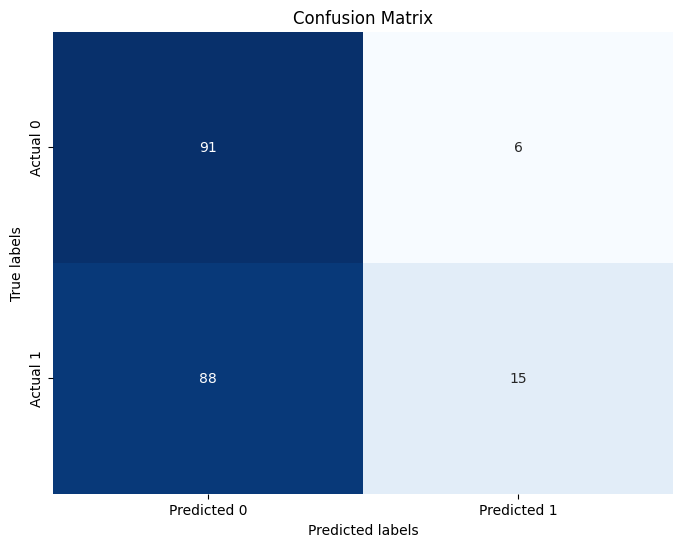

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
predictors = ["close", "volume", "open", "high", "low"]
target = "target"
predictions = model.predict(test[predictors])
cm = confusion_matrix(test[target], predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [40]:
btc

open          high           low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2024-07-07 00:00:00+00:00  58239.429688  58371.121094  55793.324219   
2024-07-08 00:00:00+00:00  55849.574219  58131.335938  54321.019531   
2024-07-09 00:00:00+00:00  56704.597656  58239.195312  56316.875000   
2024-07-10 00:00:00+00:00  58033.882812  59359.433594  57178.414062   
2024-07-11 00:00:00+00:00  57729.890625  59253.625000  57268.859375   

                                  close       volume      tomorrow  target  
Date                                                                        
2014-09-17 00:00:00+00:00    457.334015     21056800    424.440002       0  
2014-09-18 00:00:00+00:00    424.440002     34483200    394.795990       0  
2014-09-19 00:00:00+00:00    394.795990     37919700    408.903992       1  
2014-09-20 00:00:00+00:00    408.903992     36863600    398.821014       0  
2014-09-21 00:00:00+00:00    398.821014     26580100    402.152008       1  
...                                 ...          ...           ...     ...  
2024-07-07 00:00:00+00:00  55849.109375  20553359505  56705.097656       1  
2024-07-08 00:00:00+00:00  56705.097656  39766159899  58009.226562       1  
2024-07-09 00:00:00+00:00  58009.226562  27849512607  57742.496094       0  
2024-07-10 00:00:00+00:00  57742.496094  26175260526  57776.816406       1  
2024-07-11 00:00:00+00:00  57776.816406  27549720576           NaN       0  

[3586 rows x 7 columns]

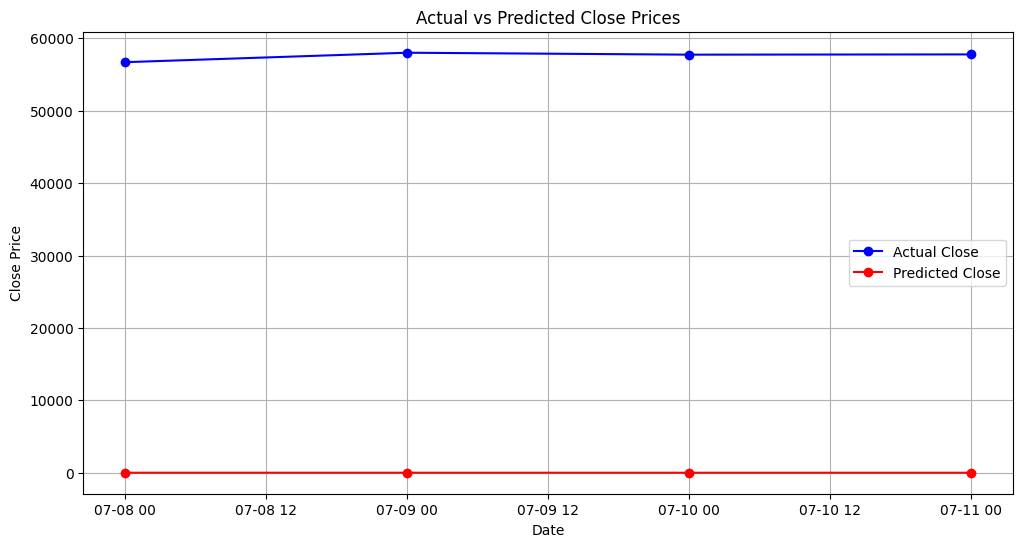

In [39]:
# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

# Splitting data into train and test sets
train = btc.iloc[:-4]  # Use last 4 rows for testing
test = btc.iloc[-4:]

# Define predictors and target
predictors = ["close", "volume", "open", "high", "low"]
target = "target"

# Training the model
model.fit(train[predictors], train[target])

# Making predictions on the test set
predictions = model.predict(test[predictors])

# Combine actual and predicted values into a single DataFrame
results = pd.DataFrame({
    'Date': test.index,  # Assuming your index is a datetime index
    'Actual_Close': test['close'].values,
    'Predicted_Close': predictions  # Replace with actual predicted values
})

# Plotting actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(results['Date'], results['Actual_Close'], marker='o', linestyle='-', color='b', label='Actual Close')
plt.plot(results['Date'], results['Predicted_Close'], marker='o', linestyle='-', color='r', label='Predicted Close')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    # Concatenate all predictions into a single DataFrame
    all_predictions_df = pd.concat(all_predictions)
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['actual_value'], label='Actual')
    plt.plot(all_predictions_df.index, all_predictions_df['predicted_value'], marker='o', linestyle='-', color='r', label='Predicted')
    plt.title('Backtest Results')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    return all_predictions_df


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [11]:
import mwclient
import time

site = mwclient.Site('en.wikipedia.org')
page = site.pages['Bitcoin']

In [12]:
revs = list(page.revisions())

In [13]:
revs = sorted(revs, key=lambda rev: rev["timestamp"]) 

In [26]:
import tensorflow as tf
from transformers import pipeline

# Print TensorFlow version
print(tf.__version__)

# Specify the model and its revision explicitly
model_name = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"
model_revision = "af0f99b"

try:
    # Initialize the sentiment-analysis pipeline with the specified model and revision
    sentiment_pipeline = pipeline("sentiment-analysis", model=model_name, revision=model_revision, framework="tf")
except RuntimeError as e:
    # If TensorFlow isn't detected, try using PyTorch
    if "At least one of TensorFlow 2.0 or PyTorch should be installed" in str(e):
        from transformers import pipeline
        sentiment_pipeline = pipeline("sentiment-analysis", model=model_name, revision=model_revision, framework="pt")
    else:
        raise e

def find_sentiment(text):
    # Perform sentiment analysis on the first 250 characters of the input text
    sent = sentiment_pipeline([text[:250]])[0]
    score = sent["score"]
    if sent["label"] == "NEGATIVE":
        score *= -1
    return score


2.17.0


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [25]:
edits = {}

for rev in revs:        
    date = time.strftime("%Y-%m-%d", rev["timestamp"])
    if date not in edits:
        edits[date] = dict(sentiments=list(), edit_count=0)
    
    edits[date]["edit_count"] += 1
    
    comment = rev.get("comment", "")
    edits[date]["sentiments"].append(find_sentiment(comment))

NameError: name 'find_sentiment' is not defined

In [ ]:
from statistics import mean

for key in edits:
    if len(edits[key]["sentiments"]) > 0:
        edits[key]["sentiment"] = mean(edits[key]["sentiments"])
        edits[key]["neg_sentiment"] = len([s for s in edits[key]["sentiments"] if s < 0]) / len(edits[key]["sentiments"])
    else:
        edits[key]["sentiment"] = 0
        edits[key]["neg_sentiment"] = 0
    
    del edits[key]["sentiments"]

In [ ]:
import pandas as pd

edits_df = pd.DataFrame.from_dict(edits, orient="index")

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-01  55.511490  54.825542  55.494766  55.046360  55.046360  141937156
2020-01-02  55.064529  55.247189  54.442657  54.826622  54.826622  163268611
2020-01-03  54.818447  55.354130  54.654873  54.742420  54.742420  209518687
2020-01-04  54.746078  54.616806  54.712635  54.865559  54.865559  136554062
2020-01-05  54.864040  54.233013  54.512573  54.384300  54.384300  144742740
...               ...        ...        ...        ...        ...        ...
2024-06-25  18.478315  18.494612  17.841476  17.990274  17.990274   12879098
2024-06-26  17.986952  18.214615  17.979033  18.207968  18.207968    8602830
2024-06-27  18.203560  18.285419  18.051805  18.050856  18.050856    6680547
2024-06-28  18.050840  17.947348  17.996080  17.879791  17.879791    6162169
2024-06-29  17.882114  17.845957  17.791609  17.879574  17.879574    7396313

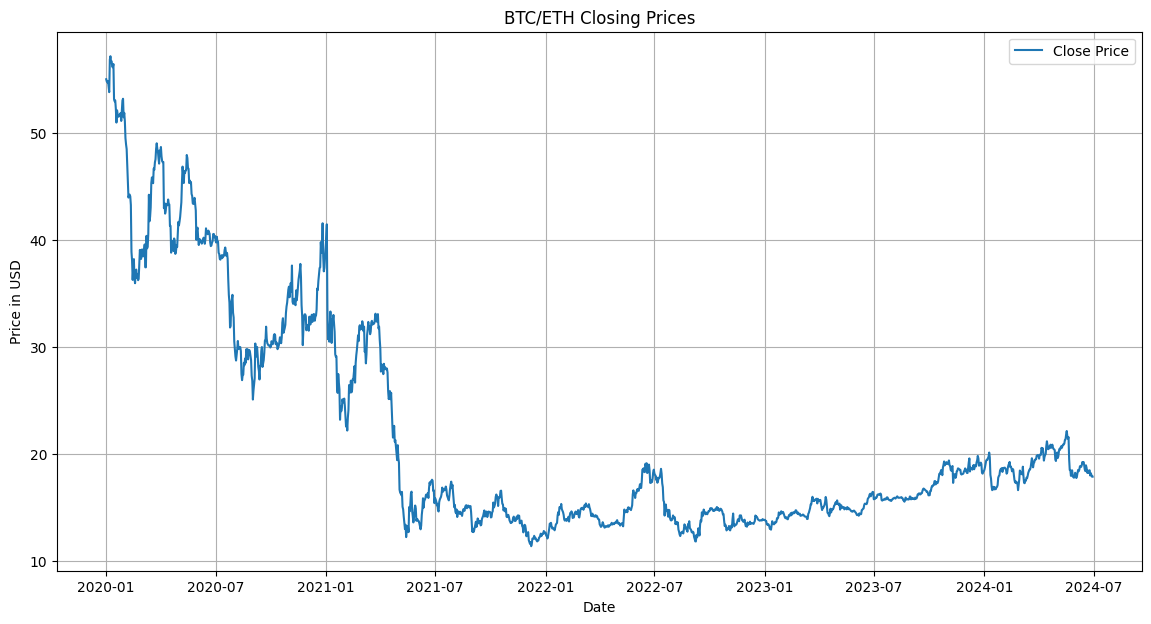

In [45]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the cryptocurrency and the currency to compare against
crypto_currency = 'BTC'
against_currency = 'ETH'

# Define the ticker symbol for Yahoo Finance
ticker = f'{crypto_currency}-{against_currency}'

# Fetch the data
data = yf.download(ticker, start='2020-01-01', end='2024-06-30')

# Display the data (optional)
print(data)

# Visualize the data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title(f'{crypto_currency}/{against_currency} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
import pandas as pd
from sqlalchemy import create_engine

# Create a SQLite database engine (change the URL according to your database setup)
engine = create_engine('sqlite:///crypto_data.db', echo=False)

# Define a function to save data to the database
def save_to_database(pair_name, df):
    # Store the DataFrame in the database with pair_name as key
    df.to_sql(pair_name, con=engine, if_exists='replace', index=True)

# Save data for BTC-ETH pair
save_to_database('BTC-ETH', data)

engine.dispose()


[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2023-01-01  0.000008  0.000008  0.000008  0.000008   0.000008   54630954
2023-01-02  0.000008  0.000008  0.000008  0.000008   0.000008   87586024
2023-01-03  0.000008  0.000008  0.000008  0.000008   0.000008   80033128
2023-01-04  0.000008  0.000008  0.000008  0.000008   0.000008  143577598
2023-01-05  0.000008  0.000009  0.000008  0.000008   0.000008  262459409
...              ...       ...       ...       ...        ...        ...
2024-06-25  0.000017  0.000018  0.000017  0.000018   0.000018  319473500
2024-06-26  0.000018  0.000018  0.000017  0.000017   0.000017  210768361
2024-06-27  0.000017  0.000018  0.000017  0.000018   0.000018  227190576
2024-06-28  0.000018  0.000018  0.000017  0.000017   0.000017  267335335
2024-06-29  0.000017  0.000017  0.000017  0.000017   0.000017  112260218

[546 rows x 6 columns]


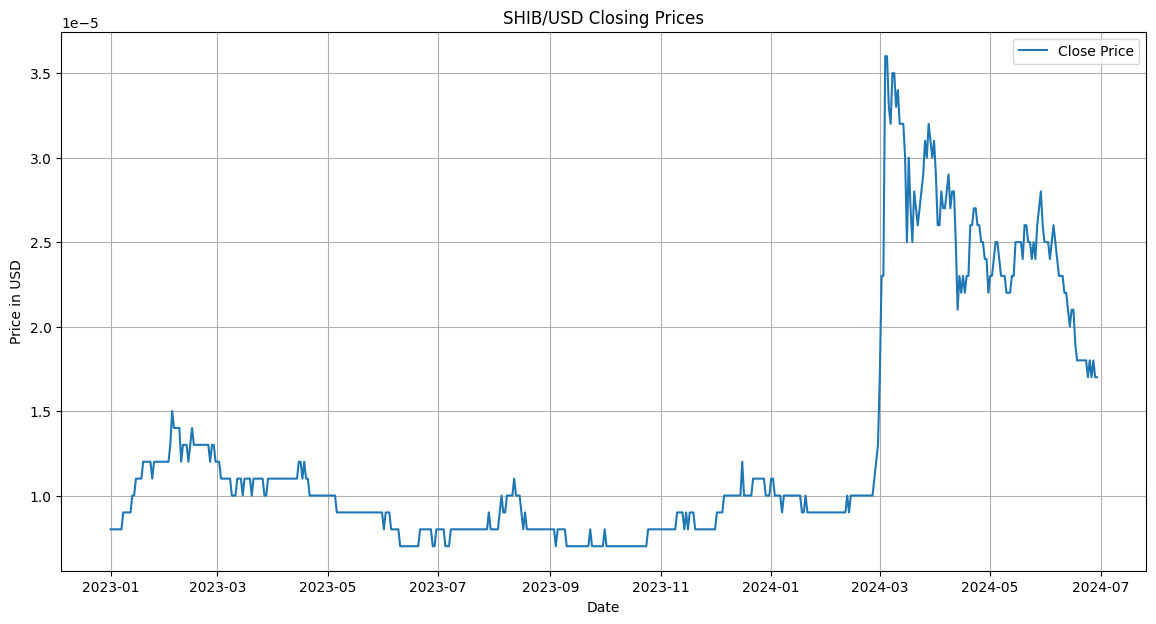

In [49]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the cryptocurrency and the currency to compare against
crypto_currency = 'SHIB'
against_currency = 'USD'

# Define the ticker symbol for Yahoo Finance
ticker = f'{crypto_currency}-{against_currency}'

# Fetch the data
data = yf.download(ticker, start='2023-01-01', end='2024-06-30')

# Display the data (optional)
print(data)

# Visualize the data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title(f'{crypto_currency}/{against_currency} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle

In [59]:
import yfinance as yf
import pandas as pd
from datetime import datetime

def download_data(crypto_currency, against_currency='USD', start_date='2014-01-01', end_date=None):
    if end_date is None:
        end_date = datetime.today().strftime('%Y-%m-%d')
        
    ticker = f'{crypto_currency}-{against_currency}'
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Currency'] = crypto_currency
    return data

# Download data for multiple cryptocurrencies with end_date as today
btc_data = download_data('BTC')
eth_data = download_data('ETH')
ltc_data = download_data('LTC')
sol_data = download_data('SOL')

# Combine the data
combined_data = pd.concat([btc_data, eth_data, ltc_data, sol_data])
combined_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   
...                ...         ...         ...         ...         ...   
2024-07-08  131.797028  141.634109  128.562927  139.463699  139.463699   
2024-07-09  139.537354  143.929382  136.740936  141.348450  141.348450   
2024-07-10  141.374146  145.853714  138.856049  141.974792  141.974792   
2024-07-11  141.982803  145.324432  135.847519  135.883224  135.883224   
2024-07-12  135.864029  140.424774  134.159149  139.528015  139.528015   

                Volume Currency  
Date                             
2014-09-17    21056800      BTC  
2014-09-18    34483200      BTC  
2014-09-19    37919700      BTC  
2014-09-20    36863600      BTC  
2014-09-21    26580100      BTC  
...                ...      ...  
2024-07-08  3692404575      SOL  
2024-07-09  2418798702      SOL  
2024-07-10  1952272010      SOL  
2024-07-11  2286890972      SOL  
2024-07-12  1990173458      SOL  

[11167 rows x 7 columns]

In [7]:
maindf = pd.DataFrame(btc_data)

# Set the index name and reset the index
maindf.index.name = 'Date'  # Name the index
maindf.reset_index(inplace=True)  # Reset the index

# Convert 'Date' column to datetime
maindf['Date'] = pd.to_datetime(maindf['Date'], infer_datetime_format=True)
maindf

/var/folders/sl/l8lgprdx0hqf525zxghqp3xr0000gn/T/ipykernel_94058/138000142.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  maindf['Date'] = pd.to_datetime(maindf['Date'], infer_datetime_format=True)


Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
3582 2024-07-08  55849.574219  58131.335938  54321.019531  56705.097656   
3583 2024-07-09  56704.597656  58239.195312  56316.875000  58009.226562   
3584 2024-07-10  58033.882812  59359.433594  57178.414062  57742.496094   
3585 2024-07-11  57729.890625  59299.433594  57120.378906  57344.914062   
3586 2024-07-12  57341.195312  58532.554688  56590.175781  57899.464844   

         Adj Close       Volume Currency  
0       457.334015     21056800      BTC  
1       424.440002     34483200      BTC  
2       394.795990     37919700      BTC  
3       408.903992     36863600      BTC  
4       398.821014     26580100      BTC  
...            ...          ...      ...  
3582  56705.097656  39766159899      BTC  
3583  58009.226562  27849512607      BTC  
3584  57742.496094  26175260526      BTC  
3585  57344.914062  28707803842      BTC  
3586  57899.464844  25604805221      BTC  

[3587 rows x 8 columns]

In [8]:
# Convert the 'Date' column to datetime with a specific format that includes time and timezone
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d %H:%M:%S%z')


In [9]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2015 = maindf.loc[(maindf['Date'] >= '2015-01-01')
                     & (maindf['Date'] < '2016-01-01')]

y_2015.drop(y_2015[['Adj Close','Volume']],axis=1) 
y_2015

Date        Open        High         Low       Close   Adj Close  \
106 2015-01-01  320.434998  320.434998  314.002991  314.248993  314.248993   
107 2015-01-02  314.079010  315.838989  313.565002  315.032013  315.032013   
108 2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
109 2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
110 2015-01-05  265.084015  278.341003  265.084015  274.473999  274.473999   
..         ...         ...         ...         ...         ...         ...   
466 2015-12-27  416.514008  424.006989  408.882996  422.822998  422.822998   
467 2015-12-28  423.342987  429.769012  418.480988  422.278992  422.278992   
468 2015-12-29  422.097992  432.983002  420.627014  432.983002  432.983002   
469 2015-12-30  433.299988  434.386993  422.084015  426.619995  426.619995   
470 2015-12-31  425.875000  432.920990  418.734985  430.566986  430.566986   

       Volume Currency  
106   8036550      BTC  
107   7860650      BTC  
108  33054400      BTC  
109  55629100      BTC  
110  43962800      BTC  
..        ...      ...  
466  53591200      BTC  
467  49638600      BTC  
468  51596500      BTC  
469  46889400      BTC  
470  45996600      BTC  

[365 rows x 8 columns]

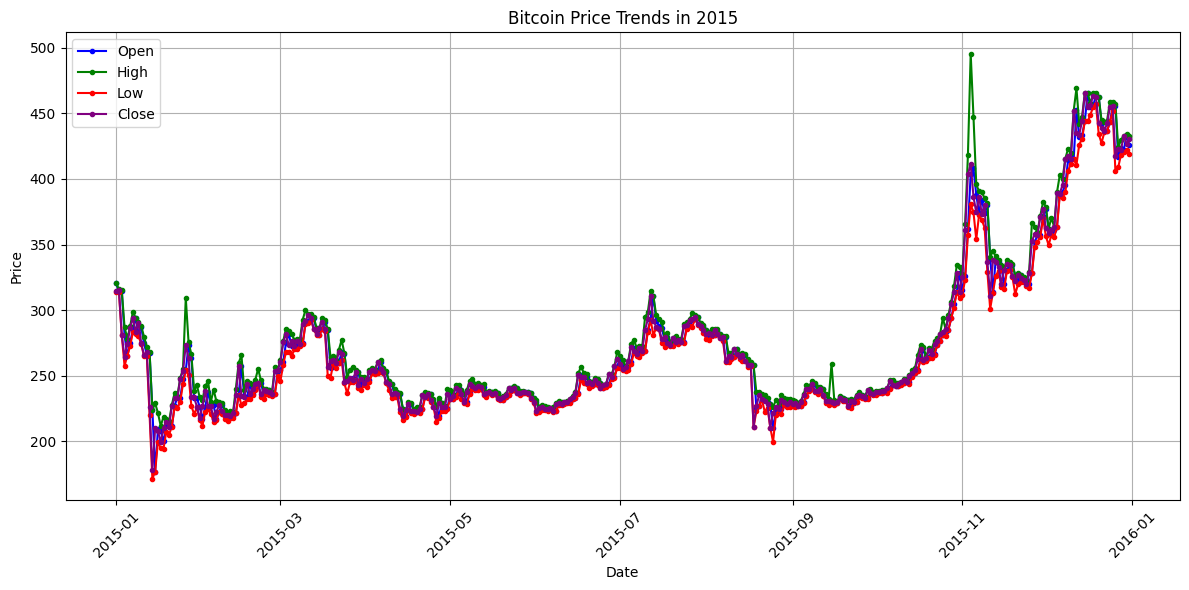

In [11]:
# Visualize the data using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(y_2015['Date'], y_2015['Open'], marker='.', linestyle='-', color='blue', label='Open')
plt.plot(y_2015['Date'], y_2015['High'], marker='.', linestyle='-', color='green', label='High')
plt.plot(y_2015['Date'], y_2015['Low'], marker='.', linestyle='-', color='red', label='Low')
plt.plot(y_2015['Date'], y_2015['Close'], marker='.', linestyle='-', color='purple', label='Close')

plt.title('Bitcoin Price Trends in 2015')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

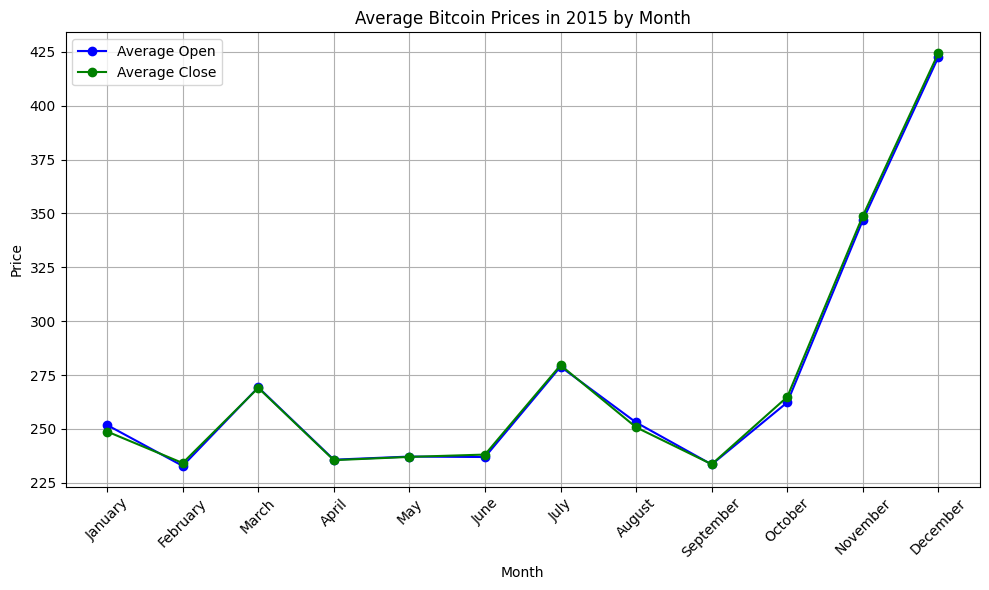

In [12]:
monthvise = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()

# Define the order of months for plotting
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the DataFrame to reflect the defined order of months
monthvise = monthvise.reindex(new_order, axis=0)

# Visualize the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(monthvise.index, monthvise['Open'], marker='o', linestyle='-', color='blue', label='Average Open')
plt.plot(monthvise.index, monthvise['Close'], marker='o', linestyle='-', color='green', label='Average Close')

plt.title('Average Bitcoin Prices in 2015 by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

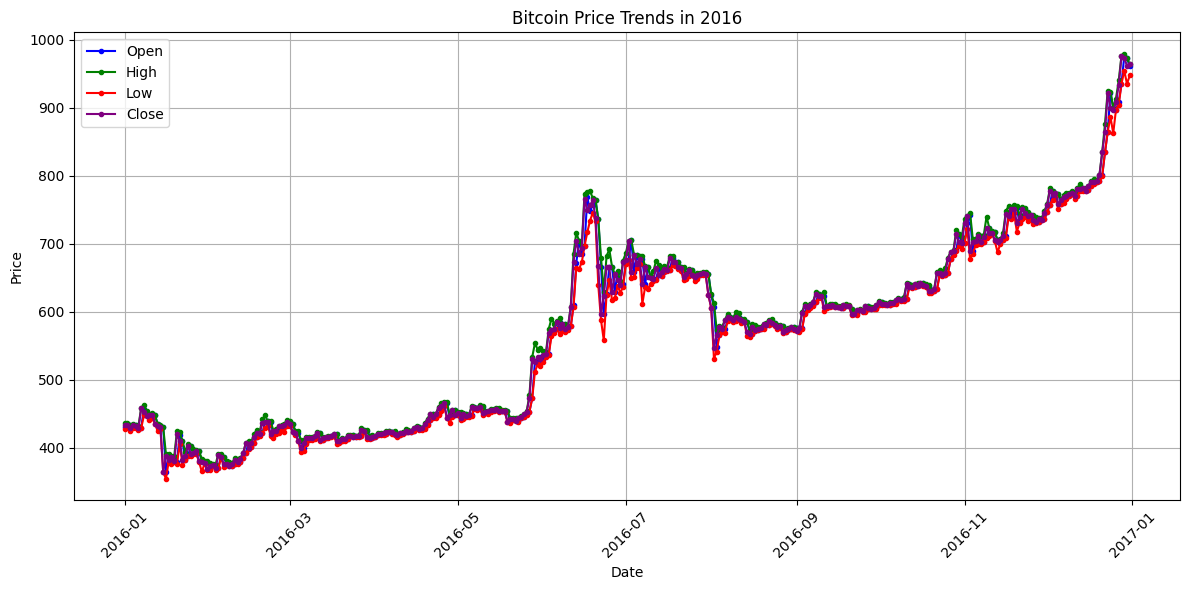

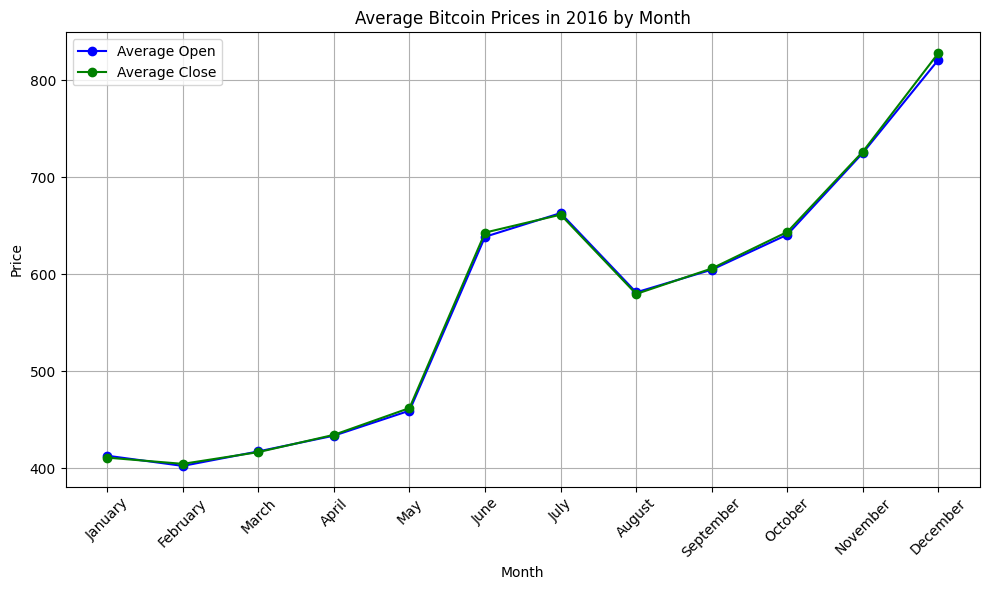

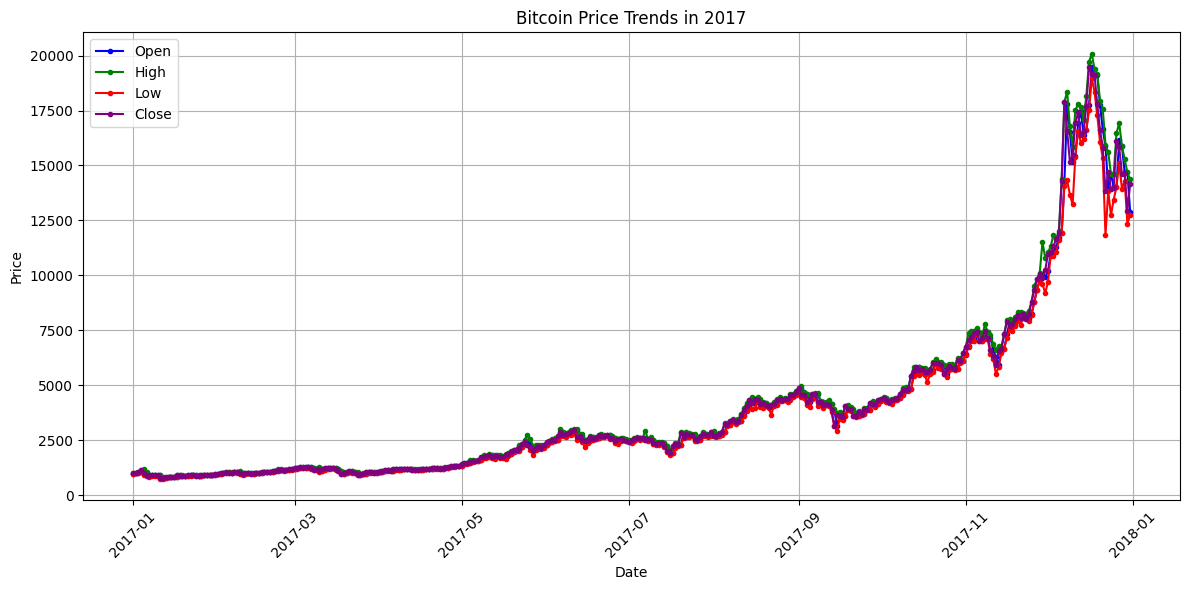

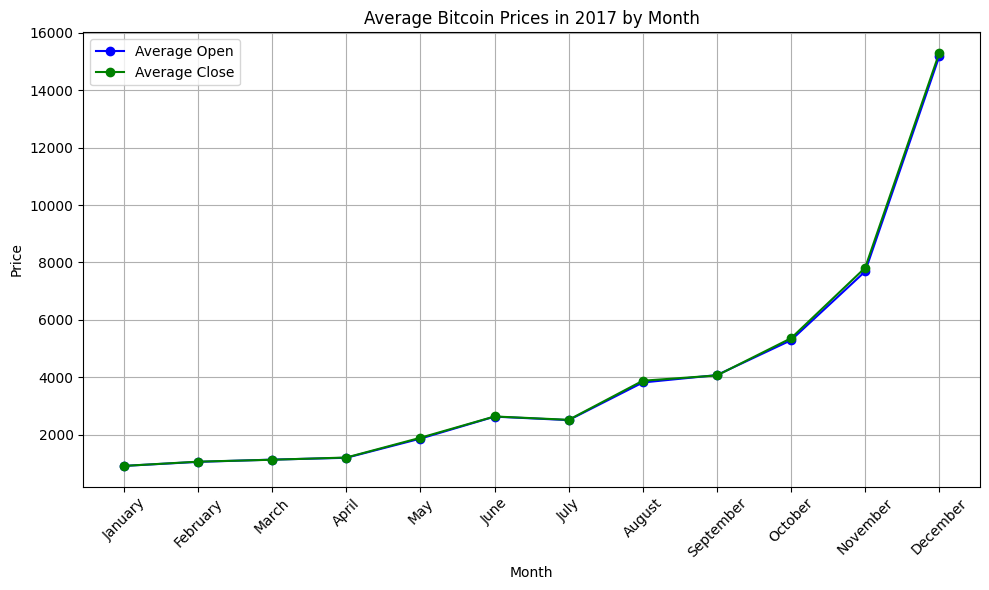

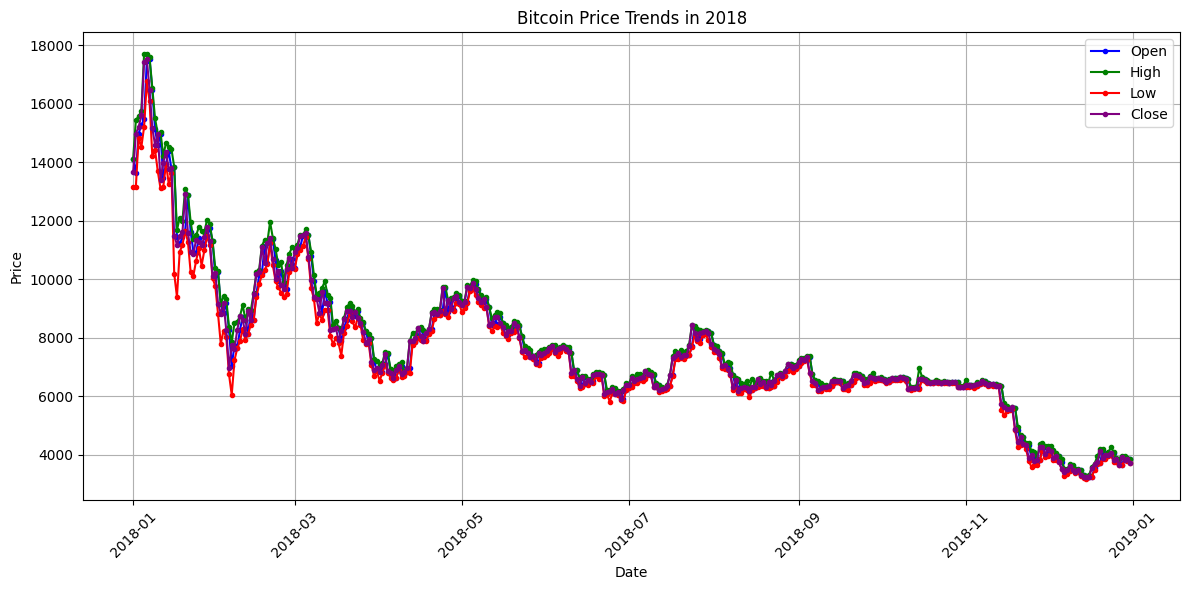

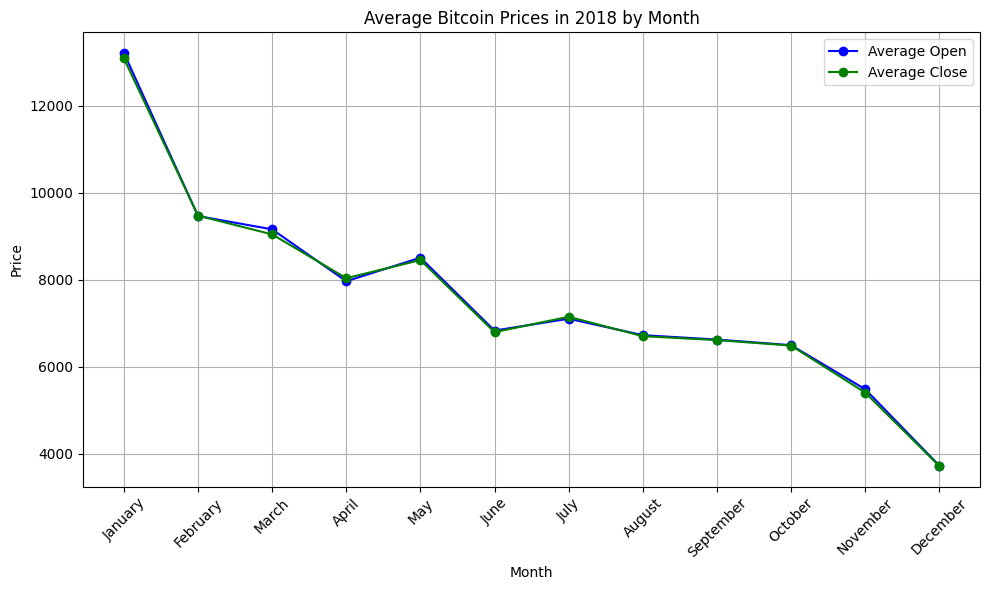

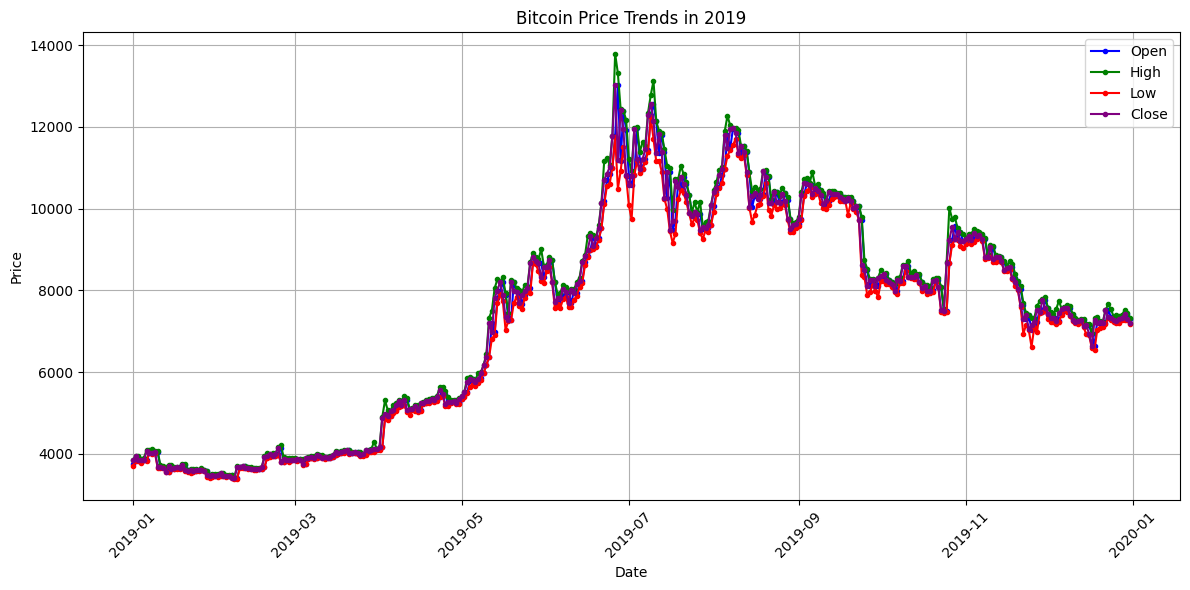

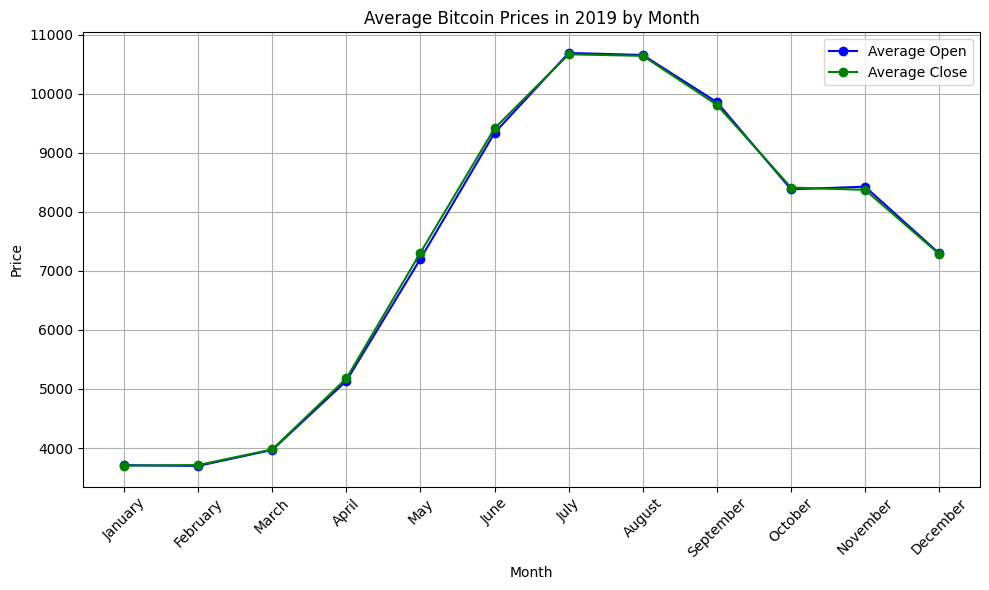

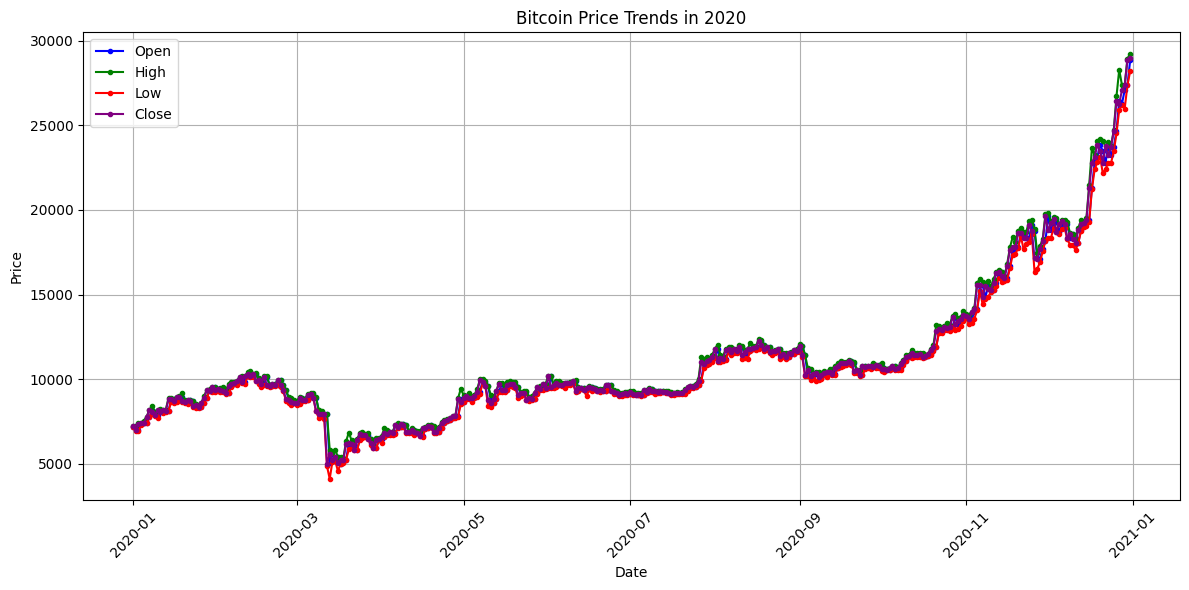

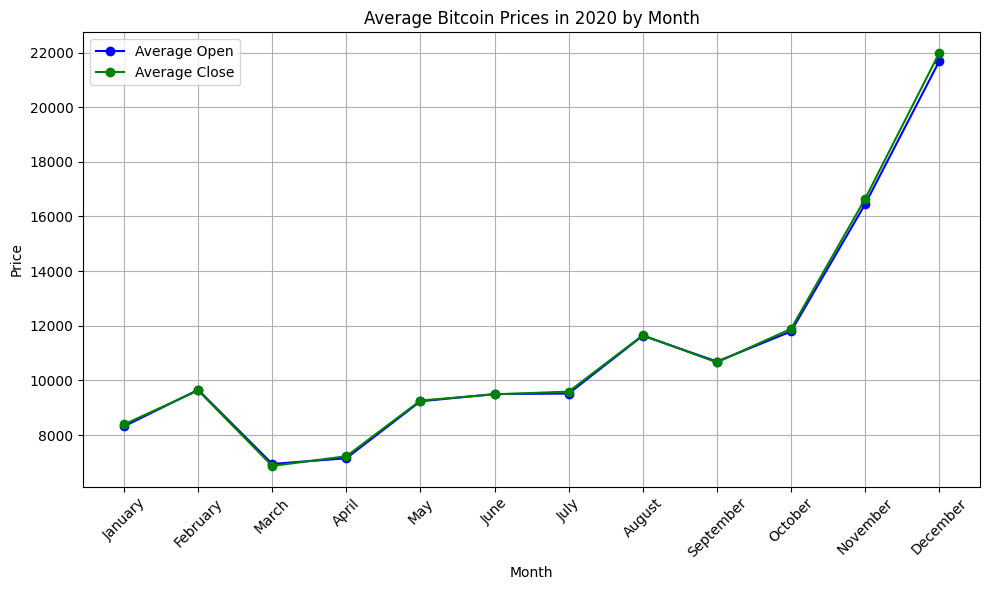

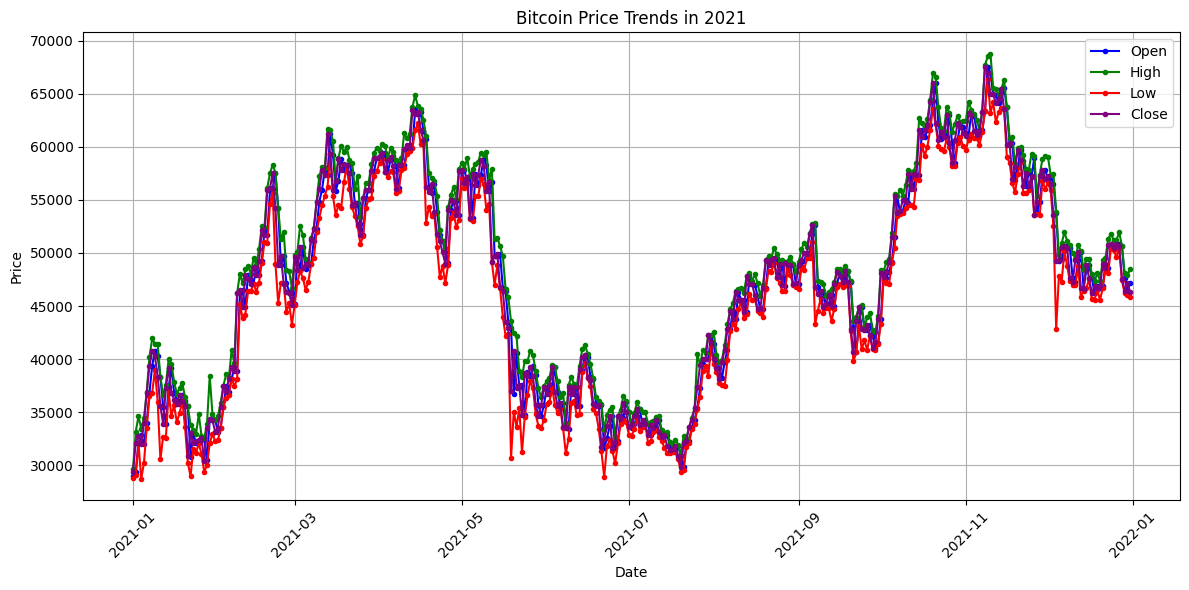

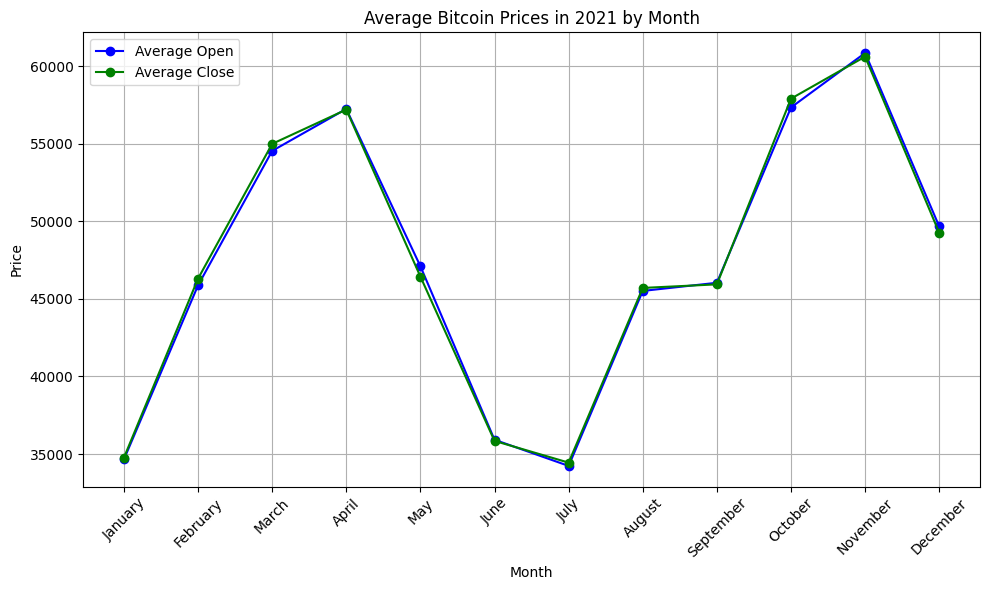

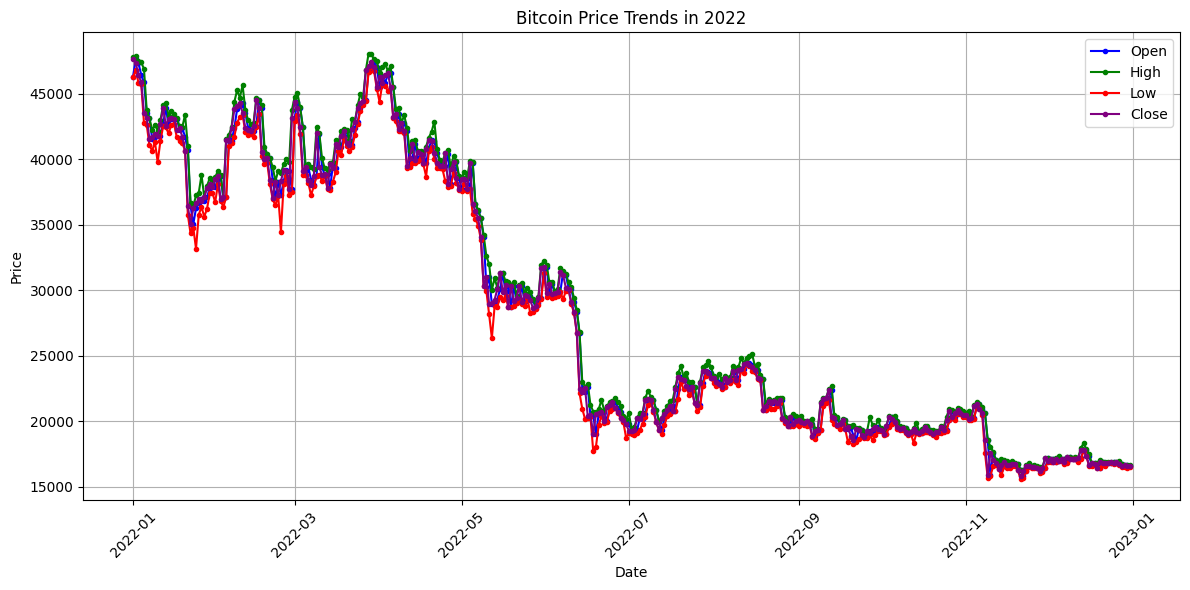

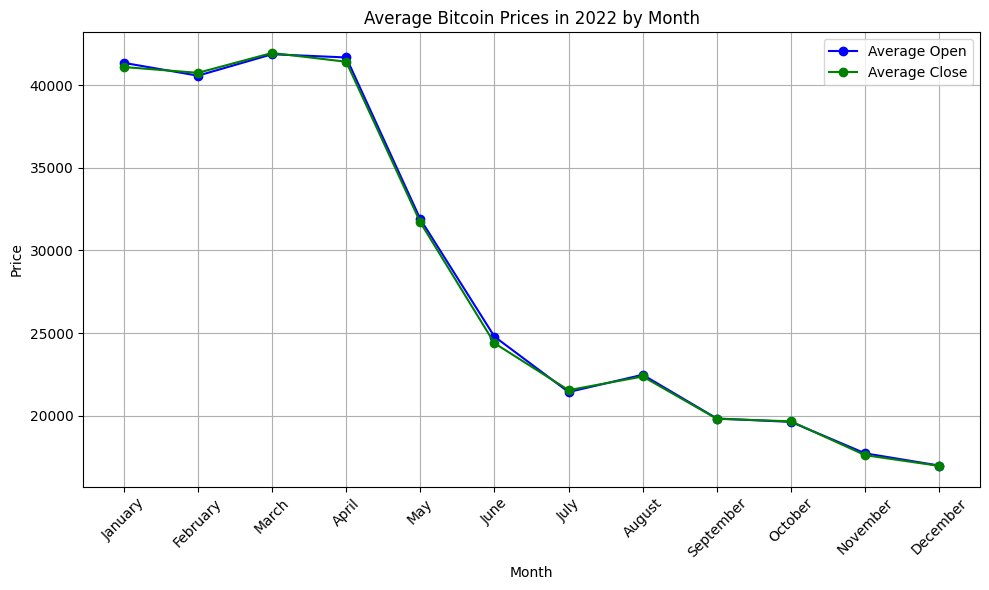

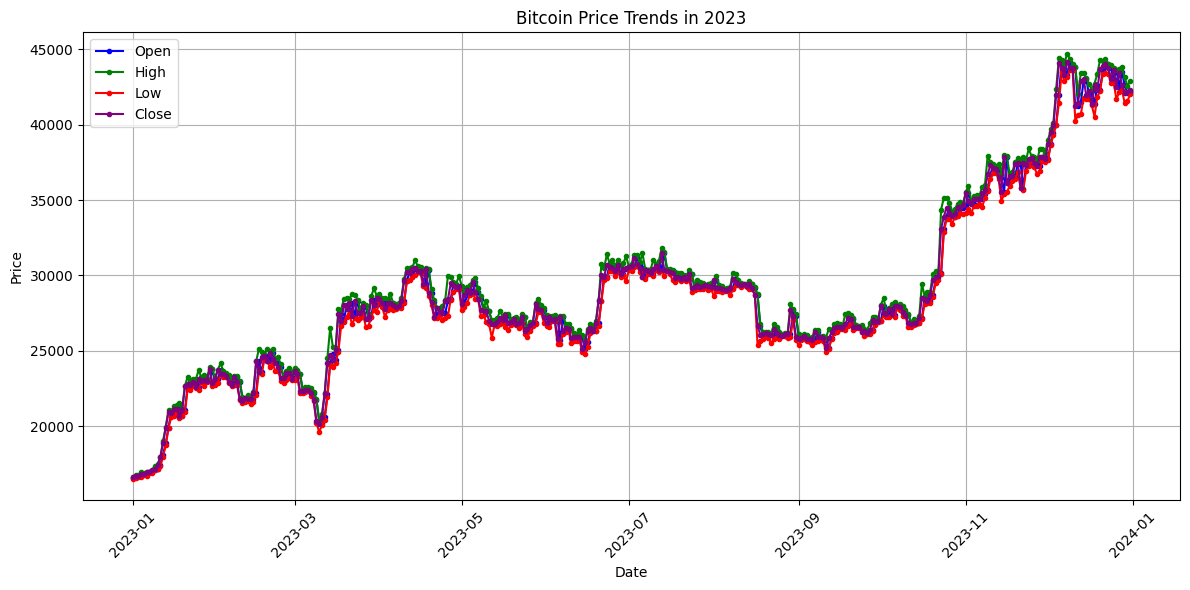

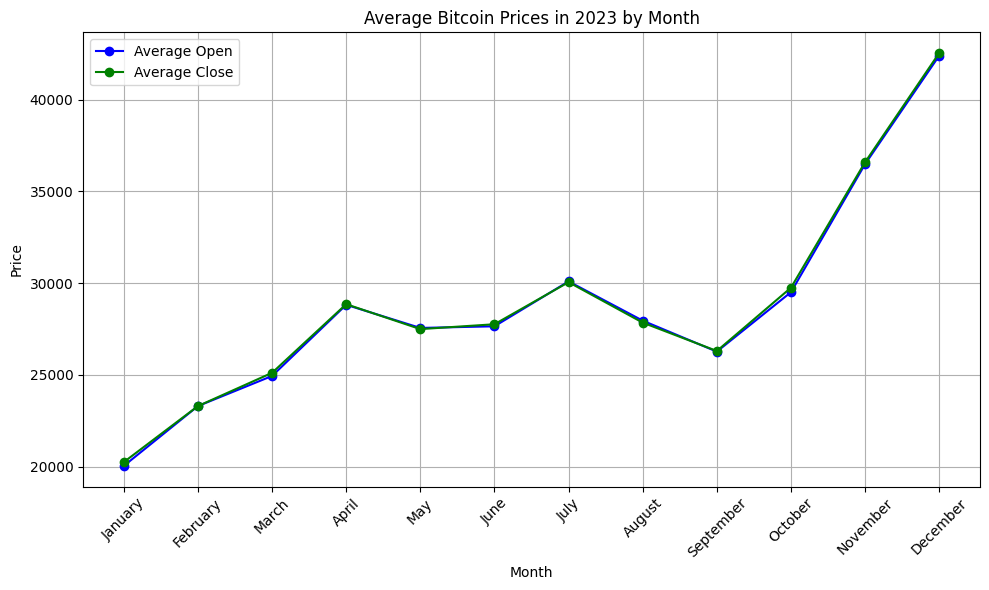

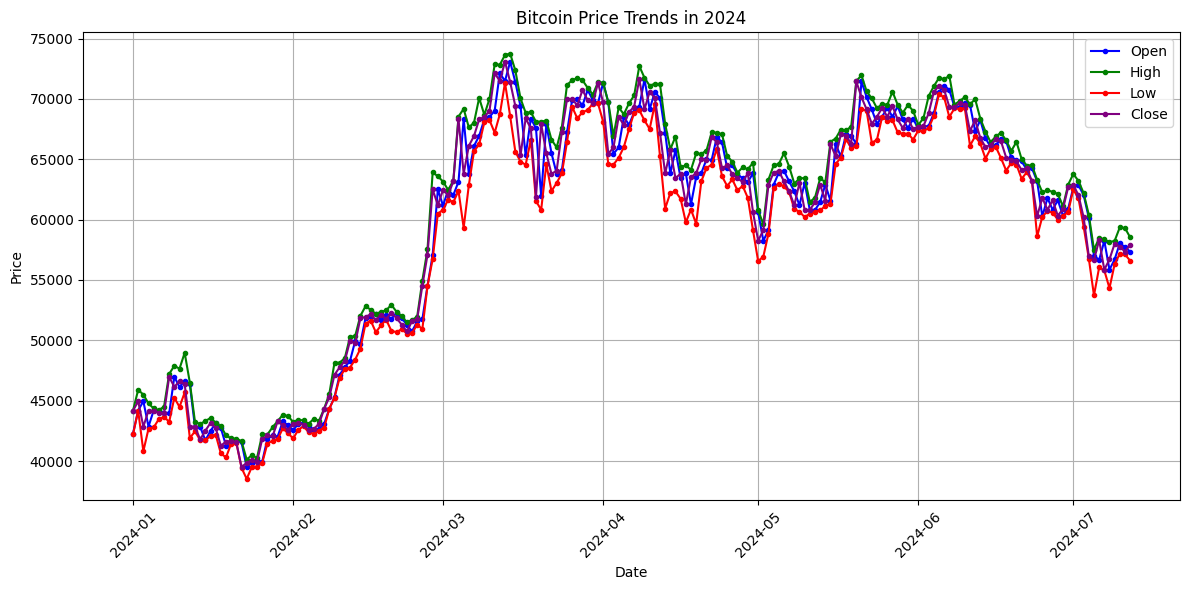

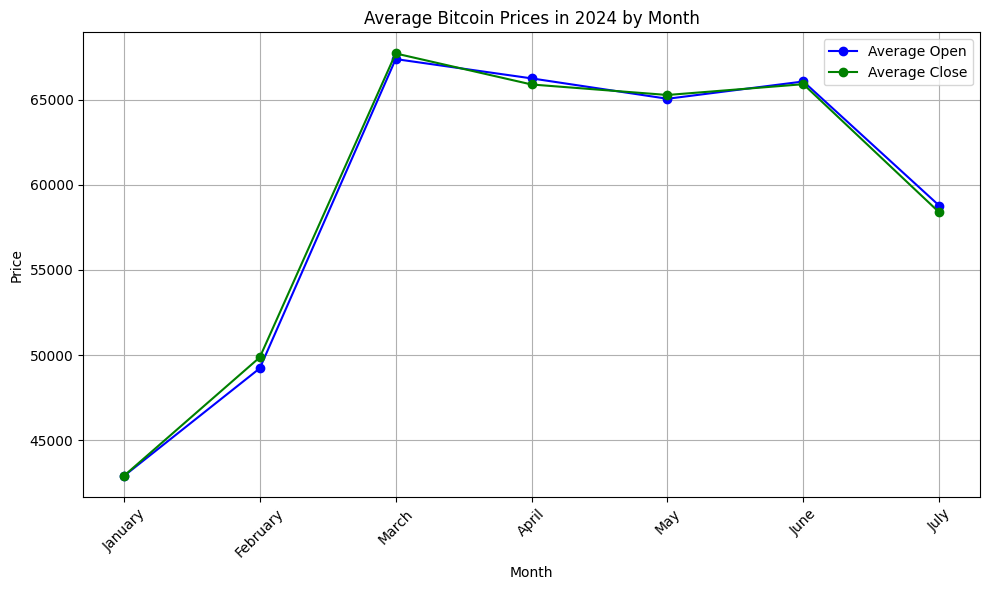

In [13]:
# Ensure 'Date' column is already in datetime format
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

# Define a function to plot and analyze data for a specific year
def plot_yearly_data(year):
    # Filter data for the specified year
    year_data = maindf.loc[(maindf['Date'] >= f'{year}-01-01') & (maindf['Date'] < f'{year + 1}-01-01')].copy()
    
    # Drop unnecessary columns if needed
    year_data = year_data.drop(['Adj Close', 'Volume'], axis=1)
    
    # Plot daily trends
    plt.figure(figsize=(12, 6))
    plt.plot(year_data['Date'], year_data['Open'], marker='.', linestyle='-', color='blue', label='Open')
    plt.plot(year_data['Date'], year_data['High'], marker='.', linestyle='-', color='green', label='High')
    plt.plot(year_data['Date'], year_data['Low'], marker='.', linestyle='-', color='red', label='Low')
    plt.plot(year_data['Date'], year_data['Close'], marker='.', linestyle='-', color='purple', label='Close')

    plt.title(f'Bitcoin Price Trends in {year}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Calculate monthly averages
    monthwise = year_data.groupby(year_data['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()
    
    # Define order of months for plotting
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']
    
    # Reindex the DataFrame to reflect the defined order of months
    monthwise = monthwise.reindex(new_order, axis=0)
    
    # Plot monthly averages
    plt.figure(figsize=(10, 6))
    plt.plot(monthwise.index, monthwise['Open'], marker='o', linestyle='-', color='blue', label='Average Open')
    plt.plot(monthwise.index, monthwise['Close'], marker='o', linestyle='-', color='green', label='Average Close')

    plt.title(f'Average Bitcoin Prices in {year} by Month')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate plots for each year from 2016 to 2024
for year in range(2016, 2025):
    plot_yearly_data(year)


In [14]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2024-07-14')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
3582 2024-07-08  55849.574219  58131.335938  54321.019531  56705.097656   
3583 2024-07-09  56704.597656  58239.195312  56316.875000  58009.226562   
3584 2024-07-10  58033.882812  59359.433594  57178.414062  57742.496094   
3585 2024-07-11  57729.890625  59299.433594  57120.378906  57344.914062   
3586 2024-07-12  57341.195312  58532.554688  56590.175781  57899.464844   

     Currency  
0         BTC  
1         BTC  
2         BTC  
3         BTC  
4         BTC  
...       ...  
3582      BTC  
3583      BTC  
3584      BTC  
3585      BTC  
3586      BTC  

[3587 rows x 6 columns]

In [15]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    16579.492690  16579.732894
February   18365.801165  18492.403748
March      21063.951157  21148.616195
April      21612.753859  21569.501019
May        19912.383328  19853.319487
June       18358.866945  18310.729459
July       14836.566321  14861.460880
August     14402.491680  14403.907037
September  13142.241365  13122.887938
October    13970.052801  14073.504420
November   15454.204473  15449.651318
December   15850.682874  15863.241374

In [16]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3587, 2)


In [17]:
closedf = closedf[closedf['Date'] > '2020-01-1']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1654


In [18]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1654, 1)


In [19]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1323, 1)
test_data:  (331, 1)


In [20]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1307, 15)
y_train:  (1307,)
X_test:  (315, 15)
y_test (315,)


In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1307, 15, 1)
X_test:  (315, 15, 1)


In [22]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

/Users/mac/Desktop/Guaduation_Project/newchain/dataProcess/virtualen/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,batch_size=32,verbose=1)

Epoch 1/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1330 - val_loss: 0.2221
Epoch 2/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0467 - val_loss: 0.0063
Epoch 3/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - val_loss: 0.0041
Epoch 4/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 5/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8839e-04 - val_loss: 0.0026
Epoch 6/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6218e-04 - val_loss: 0.0017
Epoch 7/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4697e-04 - val_loss: 0.0016
Epoch 8/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9086e-04 - val_loss: 0.0016
Epoch 9/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0716e-04 - val_loss: 0.0016
Epoch 10/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5723e-04 - val_loss: 0.0014
Epoch 11/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1313e-04 - val_loss: 0.0017
Epoch 12/300
41/41 ━━━━━━━━━━━━━━━━

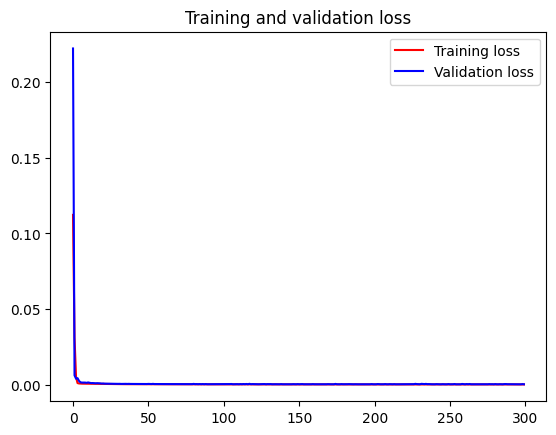

<Figure size 640x480 with 0 Axes>

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step


((1307, 1), (315, 1))

In [27]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [28]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1188.460395023714
Train data MSE:  1412438.1105399223
Train data MAE:  734.0413085190322
-------------------------------------------------------------------------------------
Test data RMSE:  1449.6325127030195
Test data MSE:  2101434.42188567
Test data MAE:  966.9039248511912


In [29]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9942264457206109
Test data explained variance regression score: 0.9915867960456239


In [30]:

print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9941984863064526
Test data R2 score: 0.991000878255233


In [31]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0014098042038325107
Test data MGD:  0.0006851007872510764
----------------------------------------------------------------------
Train data MPD:  38.09857216137384
Test data MPD:  36.8172479789368


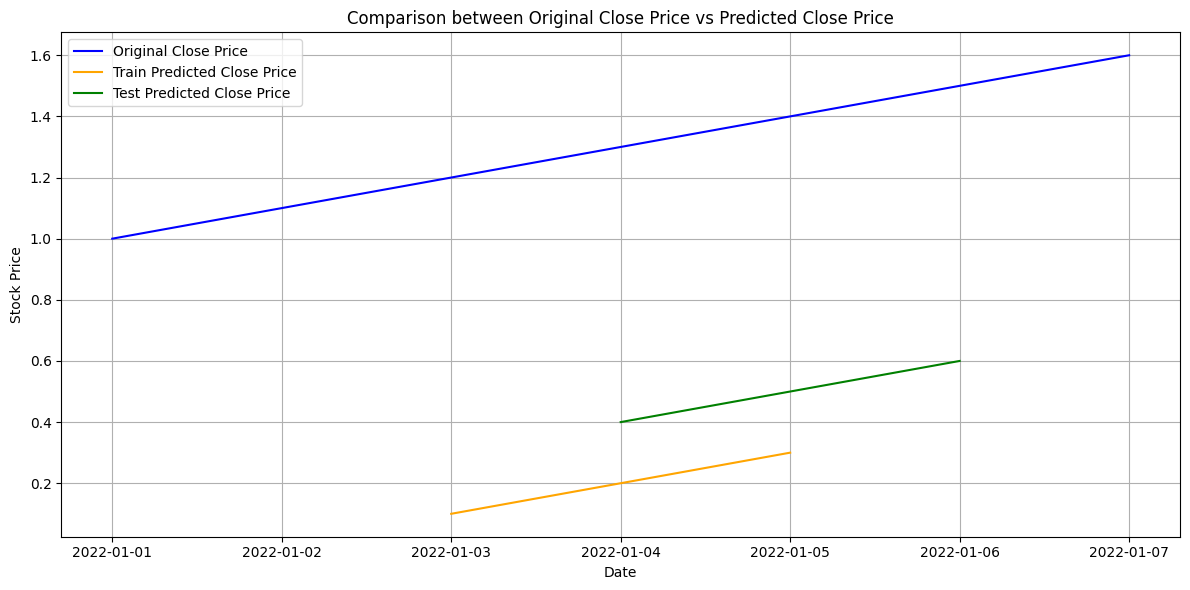

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have trainPredictPlot and testPredictPlot defined
# Replace with your actual data
trainPredictPlot = np.array([np.nan, np.nan, 0.1, 0.2, 0.3, np.nan, np.nan])
testPredictPlot = np.array([np.nan, np.nan, np.nan, 0.4, 0.5, 0.6, np.nan])

# Sample data for demonstration
close_stock = pd.DataFrame({
    'Date': pd.date_range('2022-01-01', periods=7),
    'Close': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
})

# Plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(close_stock['Date'], close_stock['Close'], label='Original Close Price', color='blue')
plt.plot(close_stock['Date'], trainPredictPlot, label='Train Predicted Close Price', color='orange')
plt.plot(close_stock['Date'], testPredictPlot, label='Test Predicted Close Price', color='green')

plt.title('Comparison between Original Close Price vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))
print(lst_output)

Output of predicted next days:  30
[[0.7743661999702454], [0.772016704082489], [0.7696298360824585], [0.7671295404434204], [0.7644580602645874], [0.7618791460990906], [0.7593691945075989], [0.756864607334137], [0.7543738484382629], [0.7519297003746033], [0.7495047450065613], [0.7470901608467102], [0.7447040677070618], [0.7423374652862549], [0.7399885058403015], [0.7376571893692017], [0.7353407144546509], [0.7330375909805298], [0.7307477593421936], [0.7284711003303528], [0.7262076139450073], [0.7239573001861572], [0.7217200994491577], [0.7194960117340088], [0.7172847390174866], [0.7150864601135254], [0.7129009366035461], [0.710728108882904], [0.7085680365562439], [0.7064204812049866]]


In [39]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


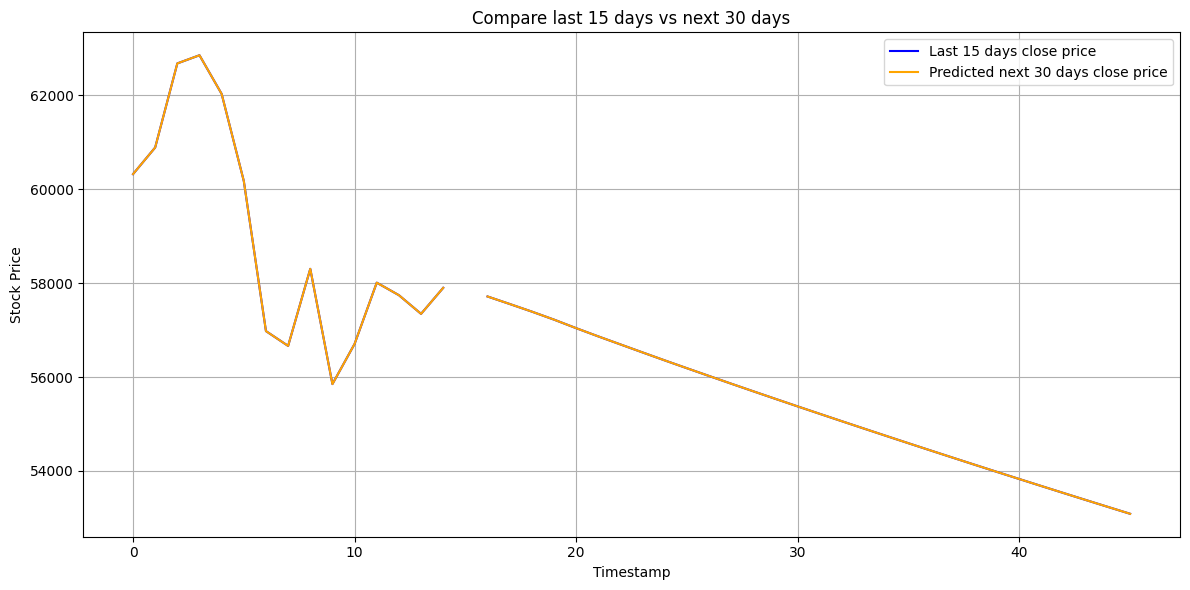

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
# Sample data for demonstration
new_pred_plot = pd.DataFrame({
    'last_original_days_value': last_original_days_value,
    'next_predicted_days_value': next_predicted_days_value
})

# Prepare Matplotlib figure
plt.figure(figsize=(12, 6))

# Plot last 15 days original close prices
plt.plot(new_pred_plot.index, new_pred_plot['last_original_days_value'], label='Last 15 days close price', color='blue')

# Plot predicted next 30 days close prices
plt.plot(new_pred_plot.index, new_pred_plot['next_predicted_days_value'], label='Predicted next 30 days close price', color='orange')

# Add title and labels
plt.title('Compare last 15 days vs next 30 days')
plt.xlabel('Timestamp')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
ticker = 'BTC-USD'
data = yf.download(ticker, start='2020-01-01', end='2024-07-15')
data['Price_Diff'] = data['Close'].diff()  # Calculate price differences
data.dropna(inplace=True)  # Drop rows with NaN values

# Ensure there are no NaN values in target variable
data.dropna(subset=['Close'], inplace=True)

# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Example features, you can add more
y = data['Close'].shift(-1)  # Predicting next day's closing price

# Drop last row of data as it will have NaN in y (shift(-1))
X.drop(X.tail(1).index, inplace=True)
y.drop(y.tail(1).index, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 4: Make predictions and evaluate the model
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Example: Predicting tomorrow's price
last_data = X[-1:].values  # Last row of data for prediction
last_data_scaled = scaler.transform(last_data)
predicted_price = model.predict(last_data_scaled)
print(f"Predicted BTC price for tomorrow: {predicted_price[0]}")

[*********************100%%**********************]  1 of 1 completed
/var/folders/sl/l8lgprdx0hqf525zxghqp3xr0000gn/T/ipykernel_94058/2359638783.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Mean Squared Error: 1780804.744802145
Predicted BTC price for tomorrow: 60358.233984375


/Users/mac/Desktop/Guaduation_Project/newchain/dataProcess/virtualen/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



[60358.233984375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875, 60416.493359375, 59913.1985546875]


/Users/mac/Desktop/Guaduation_Project/newchain/dataProcess/virtualen/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/Users/mac/Desktop/Guaduation_Project/newchain/dataProcess/virtualen/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/Users/mac/Desktop/Guaduation_Project/newchain/dataProcess/virtualen/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/Users/mac/Desktop/Guaduation_Project/newchain/dataProcess/virtualen/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/Users/mac/Desktop/Guaduation_Project/newchain/dataProcess/virtualen/lib/python3.12/site-packages/sklearn/base.py:493: U

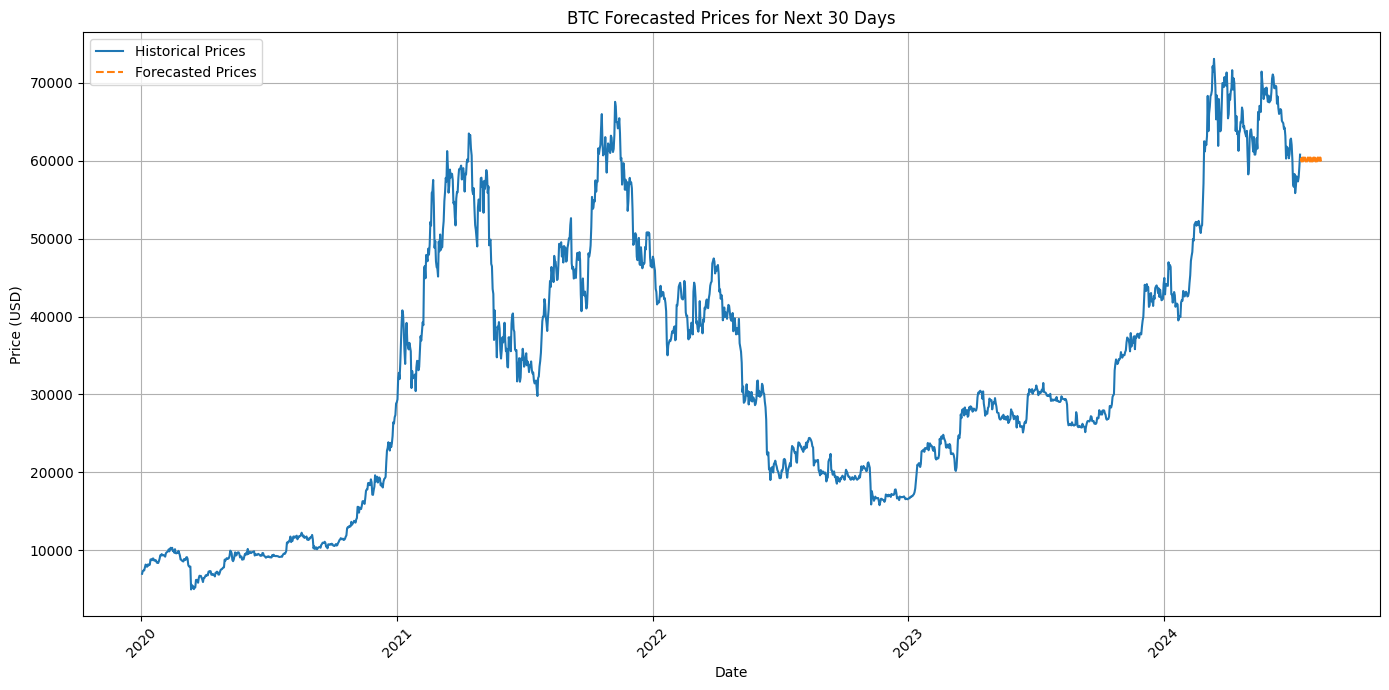

In [74]:
last_data = X[-1:].values  # Last row of data for prediction
next_data = scaler.transform(last_data)

forecasted_prices = []

for _ in range(30):
    forecast = model.predict(next_data.reshape(1, -1))
    forecasted_prices.append(forecast[0])
    next_data = scaler.transform([[forecast[0], forecast[0], forecast[0], forecast[0], 0]])

# Generate date range for forecasted prices
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
print(forecasted_prices)
# Visualize forecasted prices for the next 30 days
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Historical Prices')
plt.plot(forecast_dates, forecasted_prices, label='Forecasted Prices', linestyle='--')
plt.title('BTC Forecasted Prices for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


In [76]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 866.7425517047063
Mean Squared Error: 1780804.744802145
Root Mean Squared Error: 1334.4679631981223
R-squared: 0.993987111113041


RF Mean Absolute Error: 866.7425517047063

RF Mean Squared Error: 1780804.744802145

RF Root Mean Squared Error: 1334.4679631981223

RF R-squared: 0.993987111113041


LTSM data RMSE:  1188.460395023714

LTSM data MSE:  1412438.1105399223

LTSM data MAE:  734.0413085190322


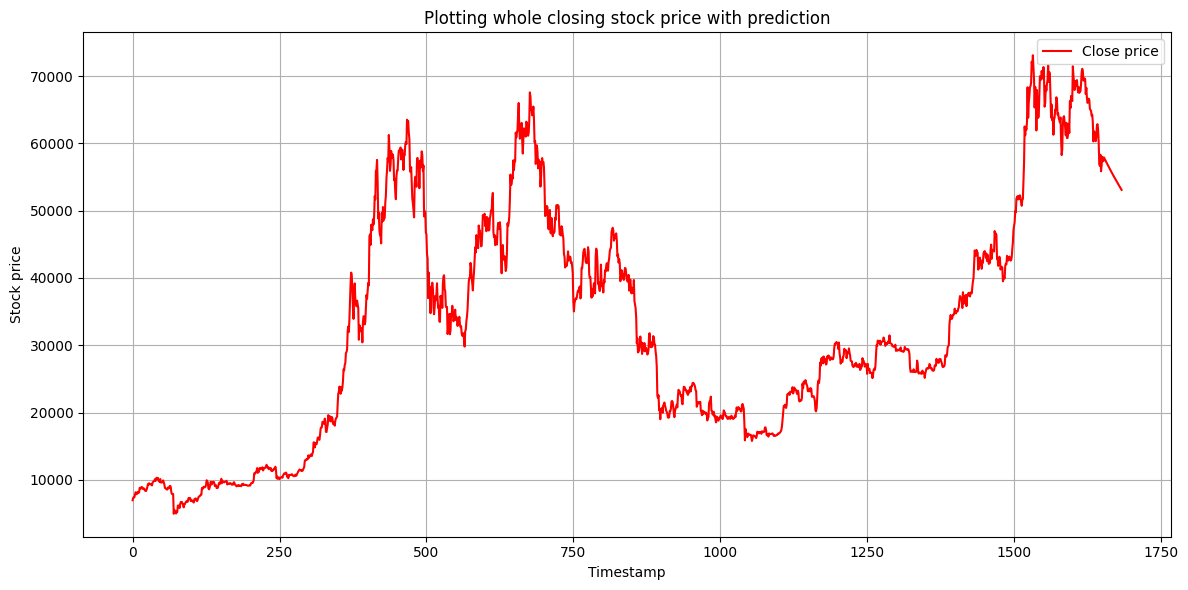

In [45]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(lstmdf, label='Close price', color='red')

# Add title and labels
plt.title('Plotting whole closing stock price with prediction')
plt.xlabel('Timestamp')
plt.ylabel('Stock price')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

[*********************100%%**********************]  1 of 1 completed


Date
2017-11-09     320.884003
2017-11-10     299.252991
2017-11-11     314.681000
2017-11-12     307.907990
2017-11-13     316.716003
                 ...     
2024-07-08    3018.731934
2024-07-09    3064.032959
2024-07-10    3102.218750
2024-07-11    3100.330811
2024-07-12    3134.158691
Name: Close, Length: 2438, dtype: float64
Epoch 0, Loss: 0.03487548593877763
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan


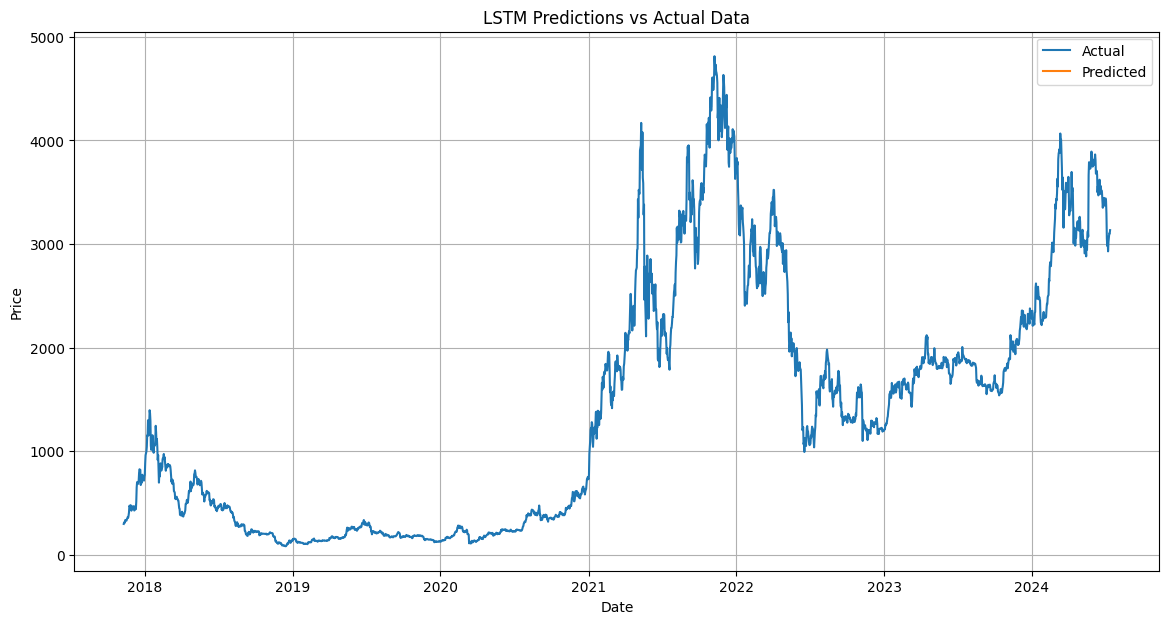